# By Mohamed Hamdy 


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,7

In [6]:
df = pd.read_csv('AirPassengers.csv')

In [7]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [12]:
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [16]:
df_final = df.set_index(['Month'])
df_final.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


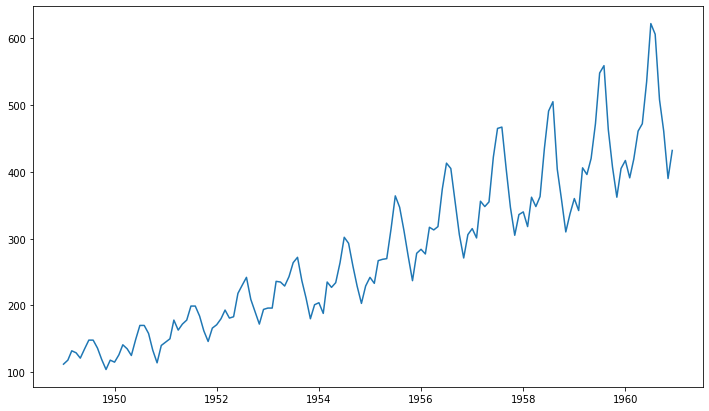

In [19]:
plt.plot(df_final);

In [27]:
# Checking Stationarity by rolling statistics 

rolmean = df_final.rolling(window=12).mean()

In [28]:
rolstd = df_final.rolling(window=12).std()

In [29]:
print(rolmean)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]


In [30]:
print(rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


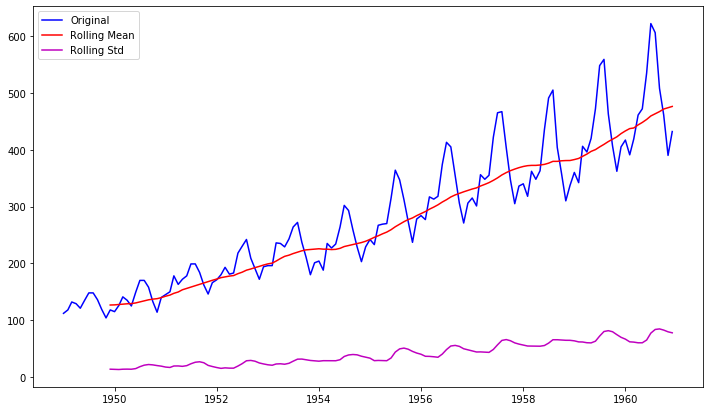

In [36]:
# Plotting rolling statistics 
plt.plot(df_final,color='blue',label='Original')
plt.plot(rolmean,color='red',label='Rolling Mean')
plt.plot(rolstd,color='m',label='Rolling Std')
plt.legend(loc='best')
plt.show()



#### We can see that the series is a Non-stationary time series  

In [39]:
df_final.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [67]:
# run Dicker-Fuller Test checking Stationarity
from statsmodels.tsa.stattools import adfuller

print('adtest Results is: ')
dftest = adfuller(df_final['#Passengers'],autolag='AIC')

dftest

adtest Results is: 


(0.8153688792060487,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [65]:
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','P-Value','#logs used','#Observations used'])

In [72]:
dftest[4].items()

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [70]:
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)
    

Test Statistics           0.815369
P-Value                   0.991880
#logs used               13.000000
#Observations used      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


#### Non-Stationary Time series, the p value is too high 

In [73]:
# Estimating the Trend
df_final_log = np.log(df_final)

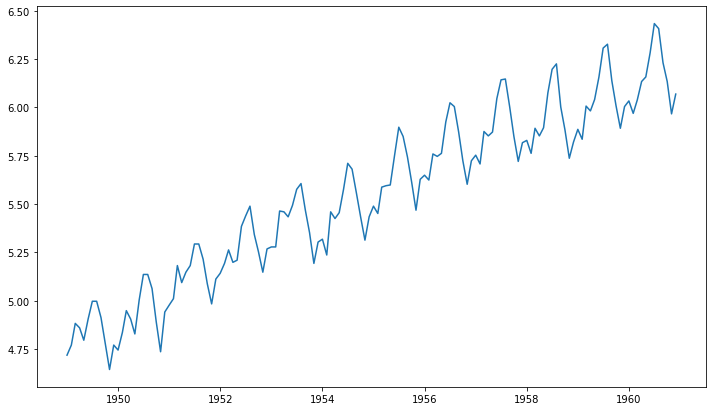

In [75]:
# Plotting the trend 
plt.plot(df_final_log);

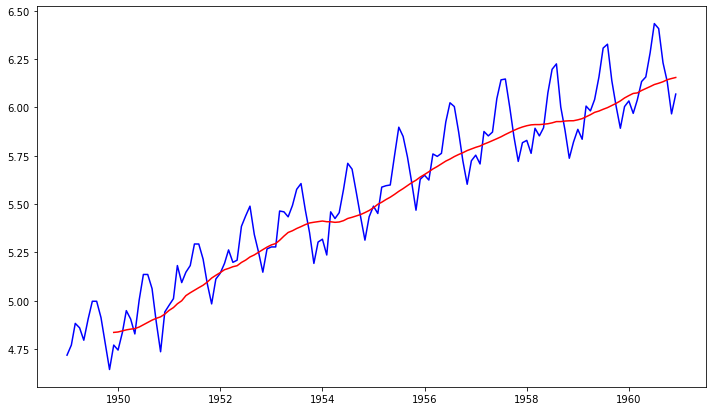

In [78]:
# plotting moving average with  df_final_log
moving_avg = df_final_log.rolling(window=12).mean()
moving_std = df_final_log.rolling(window=12).std()

plt.plot(df_final_log,color='b')
plt.plot(moving_avg,color='r')
# plt.plot(moving_std,color='m')

In [82]:
#Fixing Non_stationarity
df_log_moving_avg = df_final_log - moving_avg
df_log_moving_avg.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [83]:
# Droping NAN Values 
df_log_moving_avg.dropna(inplace=True)
df_log_moving_avg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [108]:
# Creating a test function for the TimeSeries (Rolling & adfuller)
def test_stationarity (timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    # Plotting rolling statistics 
    origin = plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd,color='m',label='Rolling Std')
    plt.legend(loc='best')
    plt.show()
    
    # Perform Dicky Fuller Test
    from statsmodels.tsa.stattools import adfuller

    print('adtest Results is: ')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','P-Value','#logs used','#Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value

    print(dfoutput)

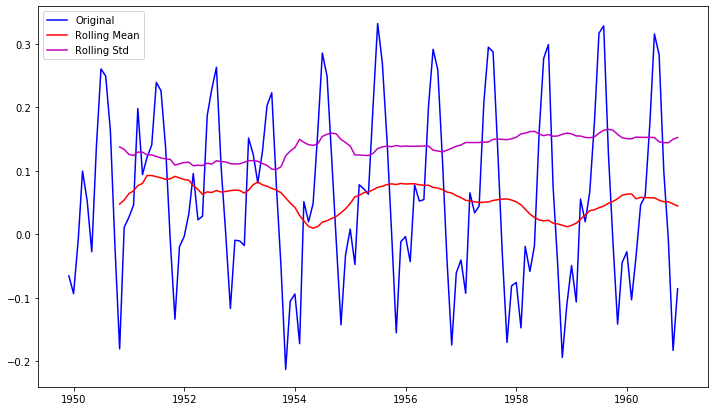

adtest Results is: 
Test Statistics          -3.162908
P-Value                   0.022235
#logs used               13.000000
#Observations used      119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [86]:
test_stationarity(df_log_moving_avg) # testing Simple mean statinarity

#### P-value is relatively less than before, and critical value almost same as test statistics

In [88]:
# Weighted average 
df_weighted_avg = df_final_log.ewm(halflife=12,min_periods=0,adjust=True).mean()# Exponential Weighted Function ewm
df_weighted_avg

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.745345
1949-03-01,4.793835
1949-04-01,4.811785
1949-05-01,4.808206
...,...
1960-08-01,6.046445
1960-09-01,6.056778
1960-10-01,6.061079


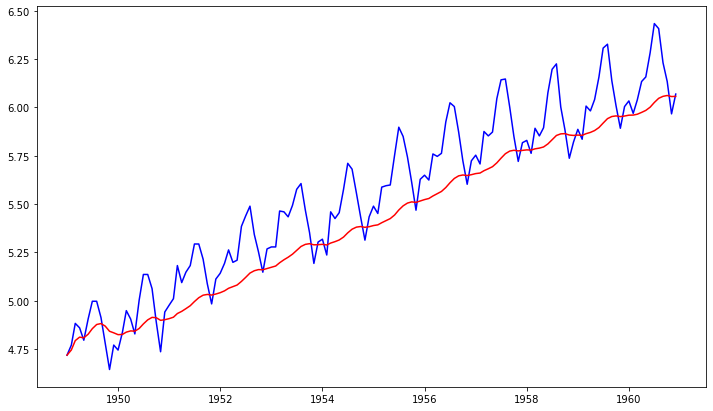

In [89]:
plt.plot(df_final_log,color='b')
plt.plot(df_weighted_avg,color='r')

In [90]:
# Subtract the log series from the weighted average 
logscale_weighted_avg = df_final_log - df_weighted_avg

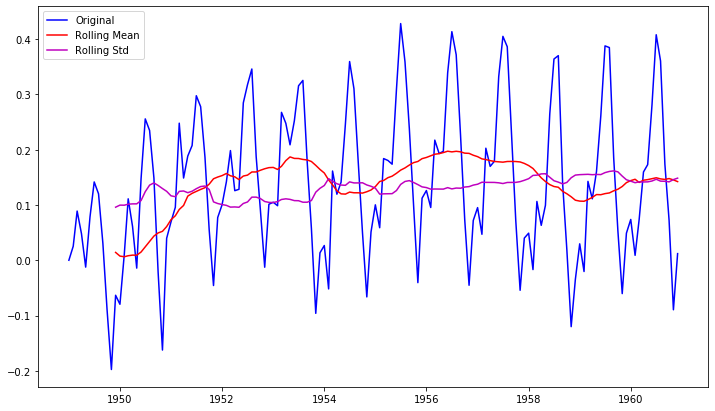

adtest Results is: 
Test Statistics          -3.601262
P-Value                   0.005737
#logs used               13.000000
#Observations used      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [91]:
test_stationarity(logscale_weighted_avg) # testing weighted mean stationarity 

##### Now our time series is Stationary 

In [92]:
# Now we are agoing to shift those mean values to the time series in order to use in Forecasting 
df_log_diff_shifting = df_final_log - df_final_log.shift()
df_log_diff_shifting 

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


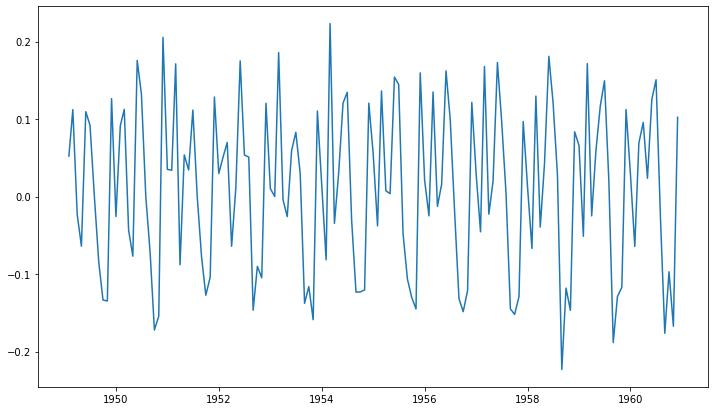

In [97]:
plt.plot(df_log_diff_shifting );

In [98]:
df_log_diff_shifting.dropna(inplace=True)

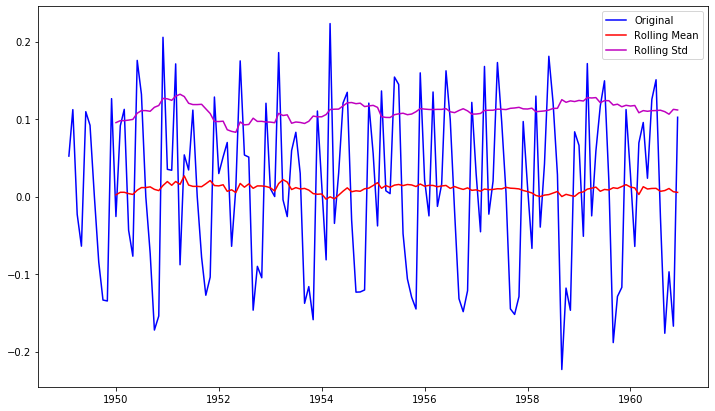

adtest Results is: 
Test Statistics          -2.717131
P-Value                   0.071121
#logs used               14.000000
#Observations used      128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [99]:
test_stationarity(df_log_diff_shifting) 

##### Now we van see that the mean and std are flattened through years

In [101]:
# Time Series Components 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_final_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

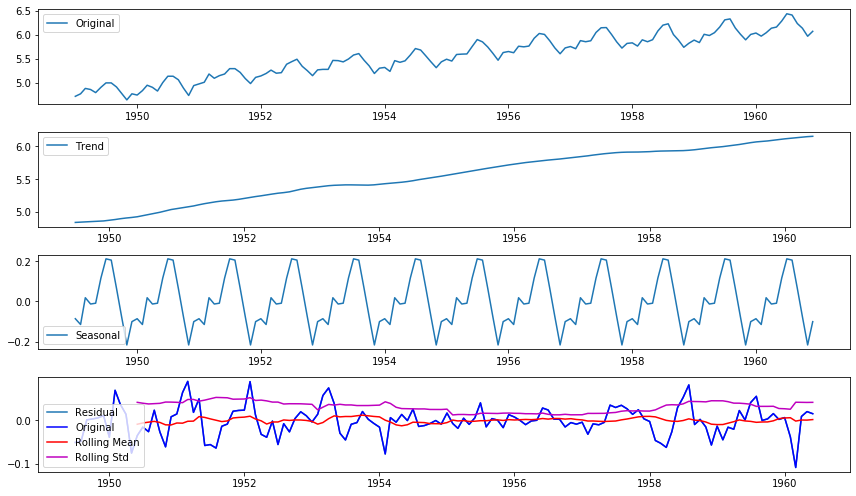

adtest Results is: 
Test Statistics        -6.332387e+00
P-Value                 2.885059e-08
#logs used              9.000000e+00
#Observations used      1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [110]:
# Plotting 

plt.subplot(411)
plt.plot(df_final_log,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

decomposition_log = residual
decomposition_log.dropna(inplace=True)
test_stationarity(decomposition_log)



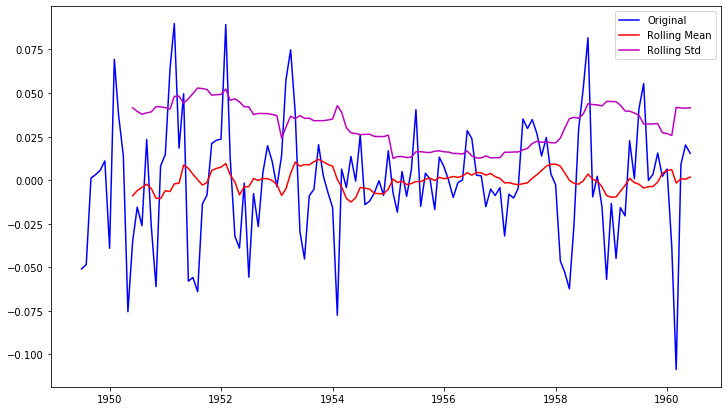

adtest Results is: 
Test Statistics        -6.332387e+00
P-Value                 2.885059e-08
#logs used              9.000000e+00
#Observations used      1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [109]:
decomposition_log = residual
decomposition_log.dropna(inplace=True)
test_stationarity(decomposition_log)


##### Not Stationary 

In [111]:
## plotting ACF & PACF

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_log_diff_shifting,nlags=20)
lag_pacf = pacf(df_log_diff_shifting,nlags=20,method='ols')

C:\Users\muham\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Partial AutoCorrelation Function')

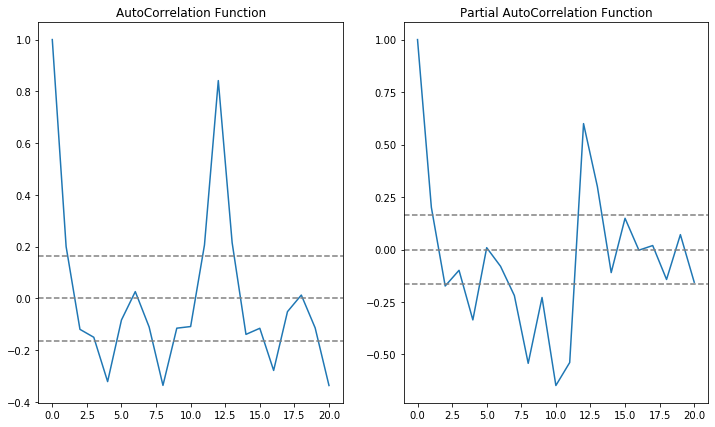

In [117]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff_shifting)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_shifting)),linestyle='--',color='grey')
plt.title('AutoCorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff_shifting)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_shifting)),linestyle='--',color='grey')
plt.title('Partial AutoCorrelation Function')

#### We can see that P = 2 , and Q=2, D =1 

# ARIMA Model

In [118]:
from statsmodels.tsa.arima_model import ARIMA

In [119]:
model = ARIMA(df_final_log,order = (2,1,2))
results = model.fit(disp=-1)

C:\Users\muham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\muham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RSS 1.029152003700902


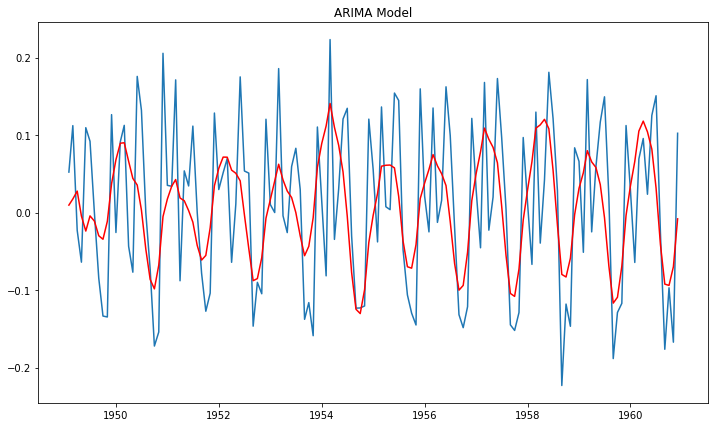

In [132]:
# Plotting 
plt.plot(df_log_diff_shifting)
plt.plot(results.fittedvalues,color='red')
plt.title('ARIMA Model')
print('RSS', sum((results.fittedvalues - df_log_diff_shifting['#Passengers'])**2 ))


In [134]:
# Fitting in one model 
pred_arima_diff = pd.Series(results.fittedvalues,copy=True)
pred_arima_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [136]:
# Convert to cummulative sum
pred_arima_diff_cumsum = pred_arima_diff.cumsum()
pred_arima_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [139]:
predictions_arima_log = pd.Series(df_final_log['#Passengers'].iloc[0],index=df_final_log.index)
predictions_arima_log = predictions_arima_log.add(pred_arima_diff_cumsum,fill_value=0)
predictions_arima_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

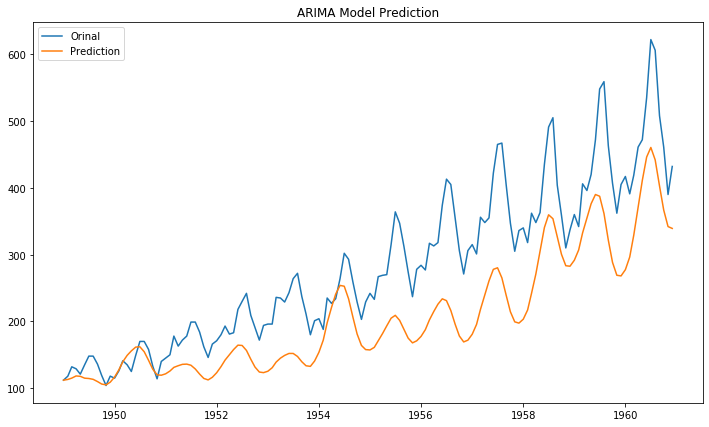

In [146]:
predictions_arima = np.exp(predictions_arima_log)
plt.plot(df_final,label='Orinal')
plt.plot(predictions_arima,label='Prediction')
plt.title('ARIMA Model Prediction')
plt.legend();

In [149]:
df_final_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


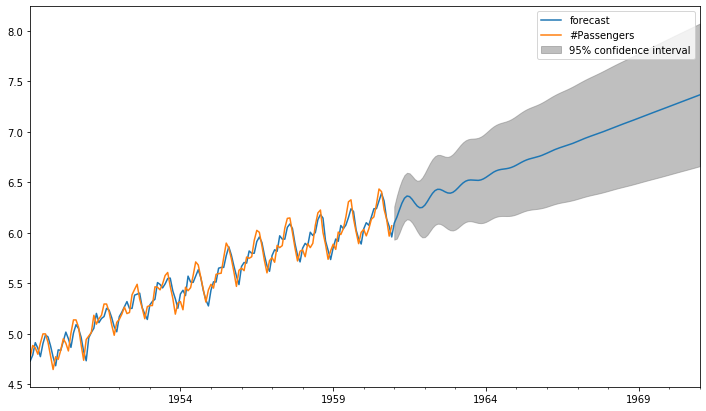

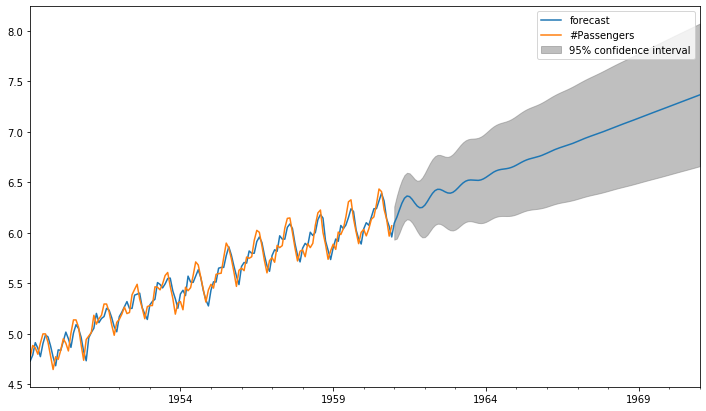

In [151]:
results.plot_predict(1,264) # predict upcoming 10 years 

In [153]:
x = results.forecast(steps=120)

In [166]:
len(x[1])

120